# FIAP - Faculdade de Informática e Administração Paulista

<p align="center">
<img src="https://upload.wikimedia.org/wikipedia/commons/d/d4/Fiap-logo-novo.jpg" alt="FIAP - Faculdade de Informática e Admnistração Paulista" border="0" width=40% height=40%>
</p>

<br>

# Nome do projeto
### Análise Preditiva de Culturas Agrícolas

## Nome do grupo

## Integrantes:
- <a href="https://www.linkedin.com/in/arthur-alentejo">Arthur Guimarães Alentejo</a>
- <a href="https://www.linkedin.com/in/michaelrodriguess">Michael Rodrigues</a>
- <a href="https://www.linkedin.com/in/matheus-sacramento-de-lima-60512542/">Matheus Sacramento Lima</a>
- <a href="https://www.linkedin.com/company/inova-fusca">Nathalia Vasconcelos</a>


## 1. Introdução

Neste trabalho, será realizada uma análise exploratória e preditiva com base em um conjunto de dados que contém informações sobre condições climáticas e do solo (como temperatura, umidade, pH, nutrientes e precipitação) relacionadas com diferentes tipos de culturas agrícolas.

O objetivo principal é:

- Compreender o comportamento das variáveis presentes no conjunto de dados;
- Identificar padrões e perfis ideais para o plantio;
- Comparar o perfil ideal com três culturas distintas;
- Construir e comparar cinco modelos de machine learning que, com base nas características fornecidas, sejam capazes de prever a cultura mais adequada a ser cultivada.


## 2. Análise Exploratória de Dados
#### Análise Exploratória dos Dados (EDA)
Nesta seção, realizamos a **análise exploratória dos dados (EDA)** da base `Atividade_Cap_14_produtos_agricolas.csv` . O objetivo principal é entender melhor a estrutura do conjunto de dados, identificar possíveis problemas (como valores ausentes ou outliers), e obter **insights iniciais** sobre a relação entre os atributos climáticos/solo e os tipos de culturas agrícolas.

As etapas realizadas nesta seção incluem:

1. Verificação da estrutura da base: formato, tipos de dados e estatísticas iniciais.

2. Checagem de valores ausentes e inconsistências.

3. Distribuição individual das variáveis numéricas, para entender seu comportamento geral.

4. Análise de outliers e variações por tipo de cultura, usando boxplots.

5. Análise de correlação entre as variáveis contínuas.

6. Visualizações de dispersão (scatterplots) para verificar separabilidade entre classes.

7. Verificação do balanceamento das classes (culturas).

Essas análises servem como **base para decisões futuras**, principalmente para a construção dos modelos preditivos e para o entendimento do "perfil ideal" de solo/clima para as culturas, que será abordado posteriormente.

### 2.1 Informações gerais

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("Atividade_Cap_14_produtos_agricolas.csv")

print("Base carregada com sucesso!")
df.sample(5)


Base carregada com sucesso!


,N,P,K,temperature,humidity,ph,rainfall,label
472,5,68,20,18.729877,61.331862,5.001039,139.871004,pigeonpeas
1848,29,17,29,29.203949,95.669973,5.959493,211.250627,coconut
1695,27,30,5,32.717485,90.546083,7.656978,113.328978,orange
1041,101,70,48,25.360592,75.031933,6.012697,116.553145,banana
1434,98,26,52,27.338977,90.697590,6.150091,28.691138,muskmelon


#### Verificando da estrutura da base: formato, tipos de dados e estatísticas iniciais.

In [14]:
print(f"Número de linhas: {df.shape[0]}")
print(f"Número de colunas: {df.shape[1]}\n")

df.info()
print("\n")


Número de linhas: 2200
Número de colunas: 8

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB




#### Estatísticas descritivas das variáveis numéricas

In [15]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


#### Análise de valores ausentes e inconsistências

In [16]:
# Verificando valores ausentes
print("Valores ausentes por coluna:")
print(df.isnull().sum())

# Verificando se há valores duplicados
duplicados = df.duplicated().sum()
print(f"\nNúmero de linhas duplicadas: {duplicados}")

# Verificando valores fora de faixas esperadas (exemplo de checagem simples)
print("\nValores fora de faixas comuns:")
print("Temperatura negativa:", (df['temperature'] < 0).sum())
print("Umidade fora da faixa [0, 100]:", ((df['humidity'] < 0) | (df['humidity'] > 100)).sum())
print("Rainfall negativa:", (df['rainfall'] < 0).sum())


Valores ausentes por coluna:
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

Número de linhas duplicadas: 0

Valores fora de faixas comuns:
Temperatura negativa: 0
Umidade fora da faixa [0, 100]: 0
Rainfall negativa: 0


### Checagem de valores ausentes e inconsistências

Nesta etapa, verificamos a integridade da base de dados em relação à presença de valores ausentes, duplicados e dados que fogem de faixas aceitáveis para variáveis ambientais.

**Achados principais:**

- **Não foram encontrados valores ausentes** em nenhuma das colunas da base.
- **Não há linhas duplicadas**, o que indica que cada registro representa uma condição única de solo/clima.
- Foram verificadas as seguintes faixas para inconsistências:
  - **Temperatura**: nenhuma temperatura negativa foi encontrada, o que é coerente com o uso agrícola.
  - **Umidade**: todos os valores estão entre 0 e 100%, como esperado.
  - **Precipitação (rainfall)**: não há valores negativos.

Com isso, concluímos que a base está **limpa e pronta para as análises exploratórias e estatísticas subsequentes**, sem necessidade de tratamentos adicionais neste momento.


#### Distribuição das variáveis numéricas

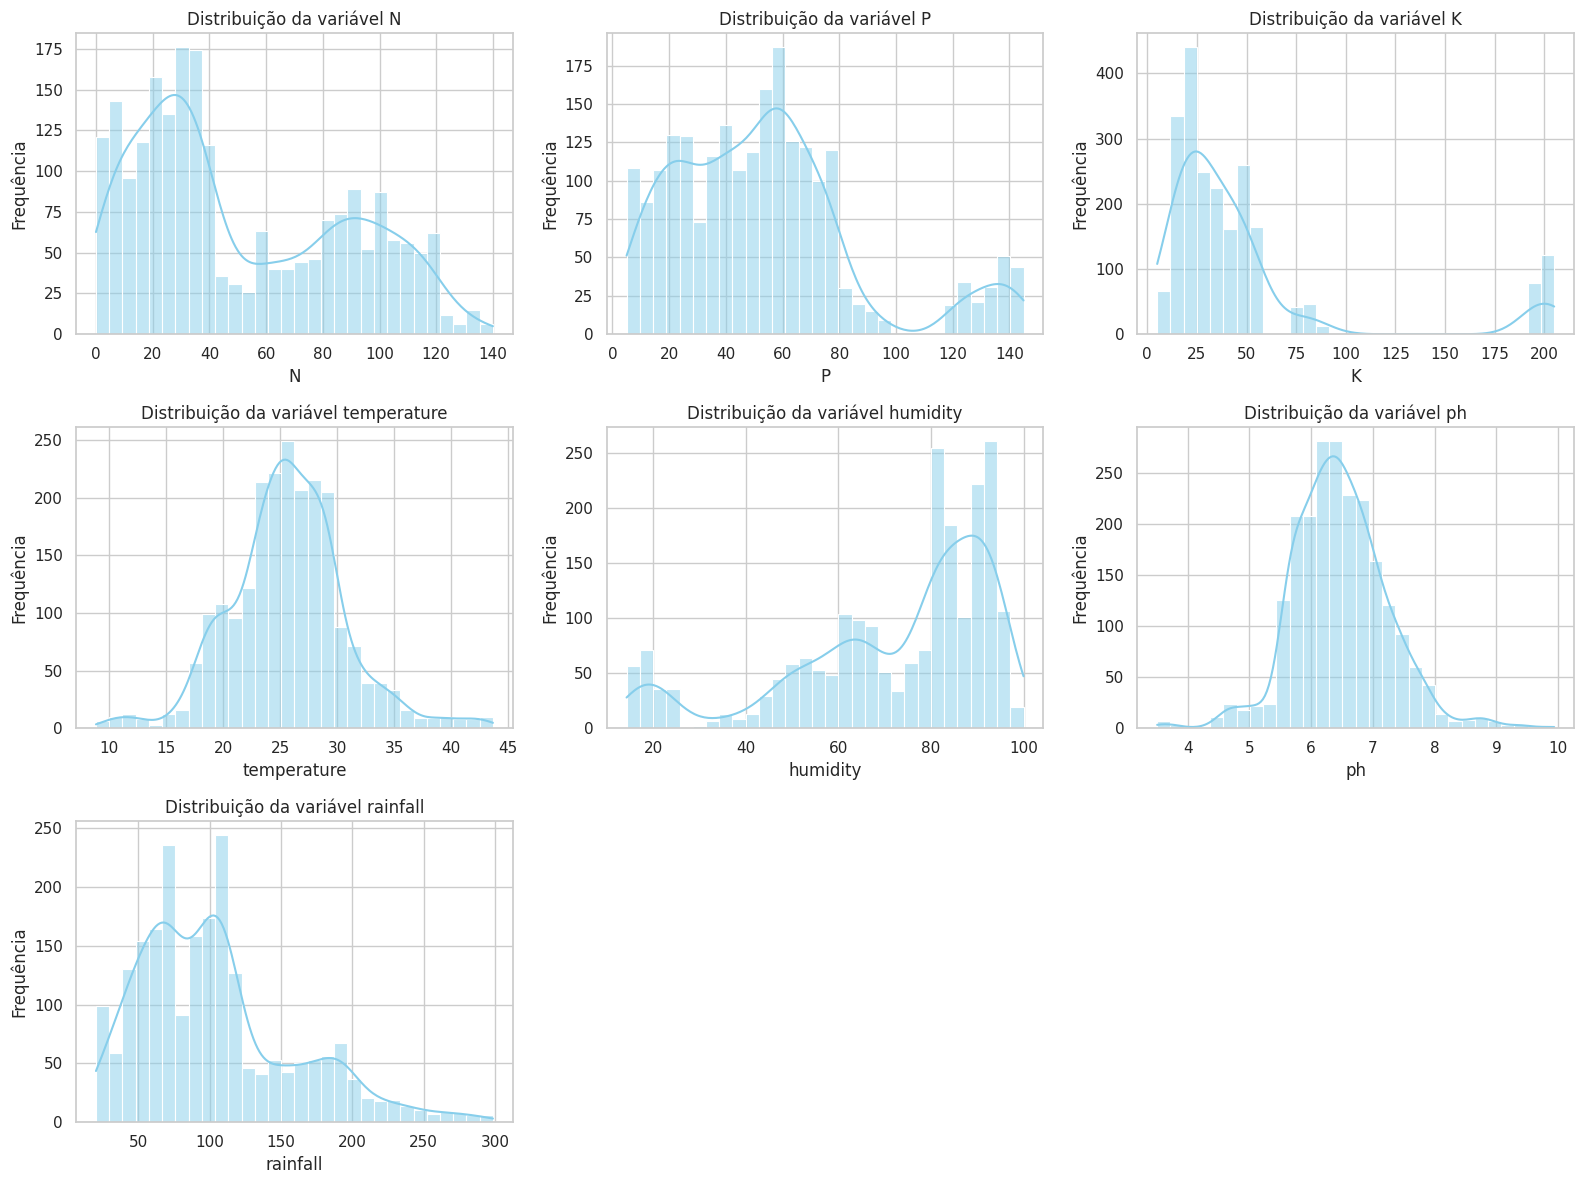

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tamanho geral dos gráficos
plt.figure(figsize=(16, 12))

# Lista de colunas numéricas
colunas_numericas = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

# Criando histogramas
for i, coluna in enumerate(colunas_numericas, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[coluna], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribuição da variável {coluna}')
    plt.xlabel(coluna)
    plt.ylabel('Frequência')

plt.tight_layout()
plt.show()


### Distribuição das Variáveis Numéricas

A análise da distribuição das variáveis numéricas permite entender o comportamento de cada atributo do solo e clima na base de dados.

**Principais observações:**

- **Nitrogênio (N)**
    - Apresenta uma distribuição bimodal, indicando dois grupos distintos de concentração de nitrogênio no solo. Pode sugerir que algumas culturas demandam níveis muito diferentes desse nutriente.
- **Fósforo (P)**
    - Distribuição assimétrica à direita (right-skewed), com a maioria dos solos tendo baixa concentração de fósforo e poucos com níveis elevados.

- **Potássio (K):**
    - Também assimétrica à direita, com uma alta concentração de registros em baixos níveis de potássio, e poucos registros com valores altos.

- **Temperatura:**
    - Distribuição aproximadamente normal, centrada entre 25°C e 27°C, o que sugere uma predominância de regiões tropicais ou subtropicais na base.

- **Umidade:**
    - Apresenta picos em faixas específicas, especialmente acima de 80%, indicando uma possível recorrência de determinadas condições climáticas mais úmidas nas regiões estudadas.

- **pH:**
    - Distribuição levemente simétrica, com a maior parte dos solos variando entre pH 5,5 e 7,5. Essa faixa é geralmente considerada ideal para muitas culturas agrícolas.

- **Precipitação (rainfall):**
    - A distribuição é assimétrica à direita, com muitos registros com precipitação entre 50 mm e 150 mm, e uma cauda que se estende para valores acima de 200 mm.


### Outliers e Variações por Tipo de Cultura

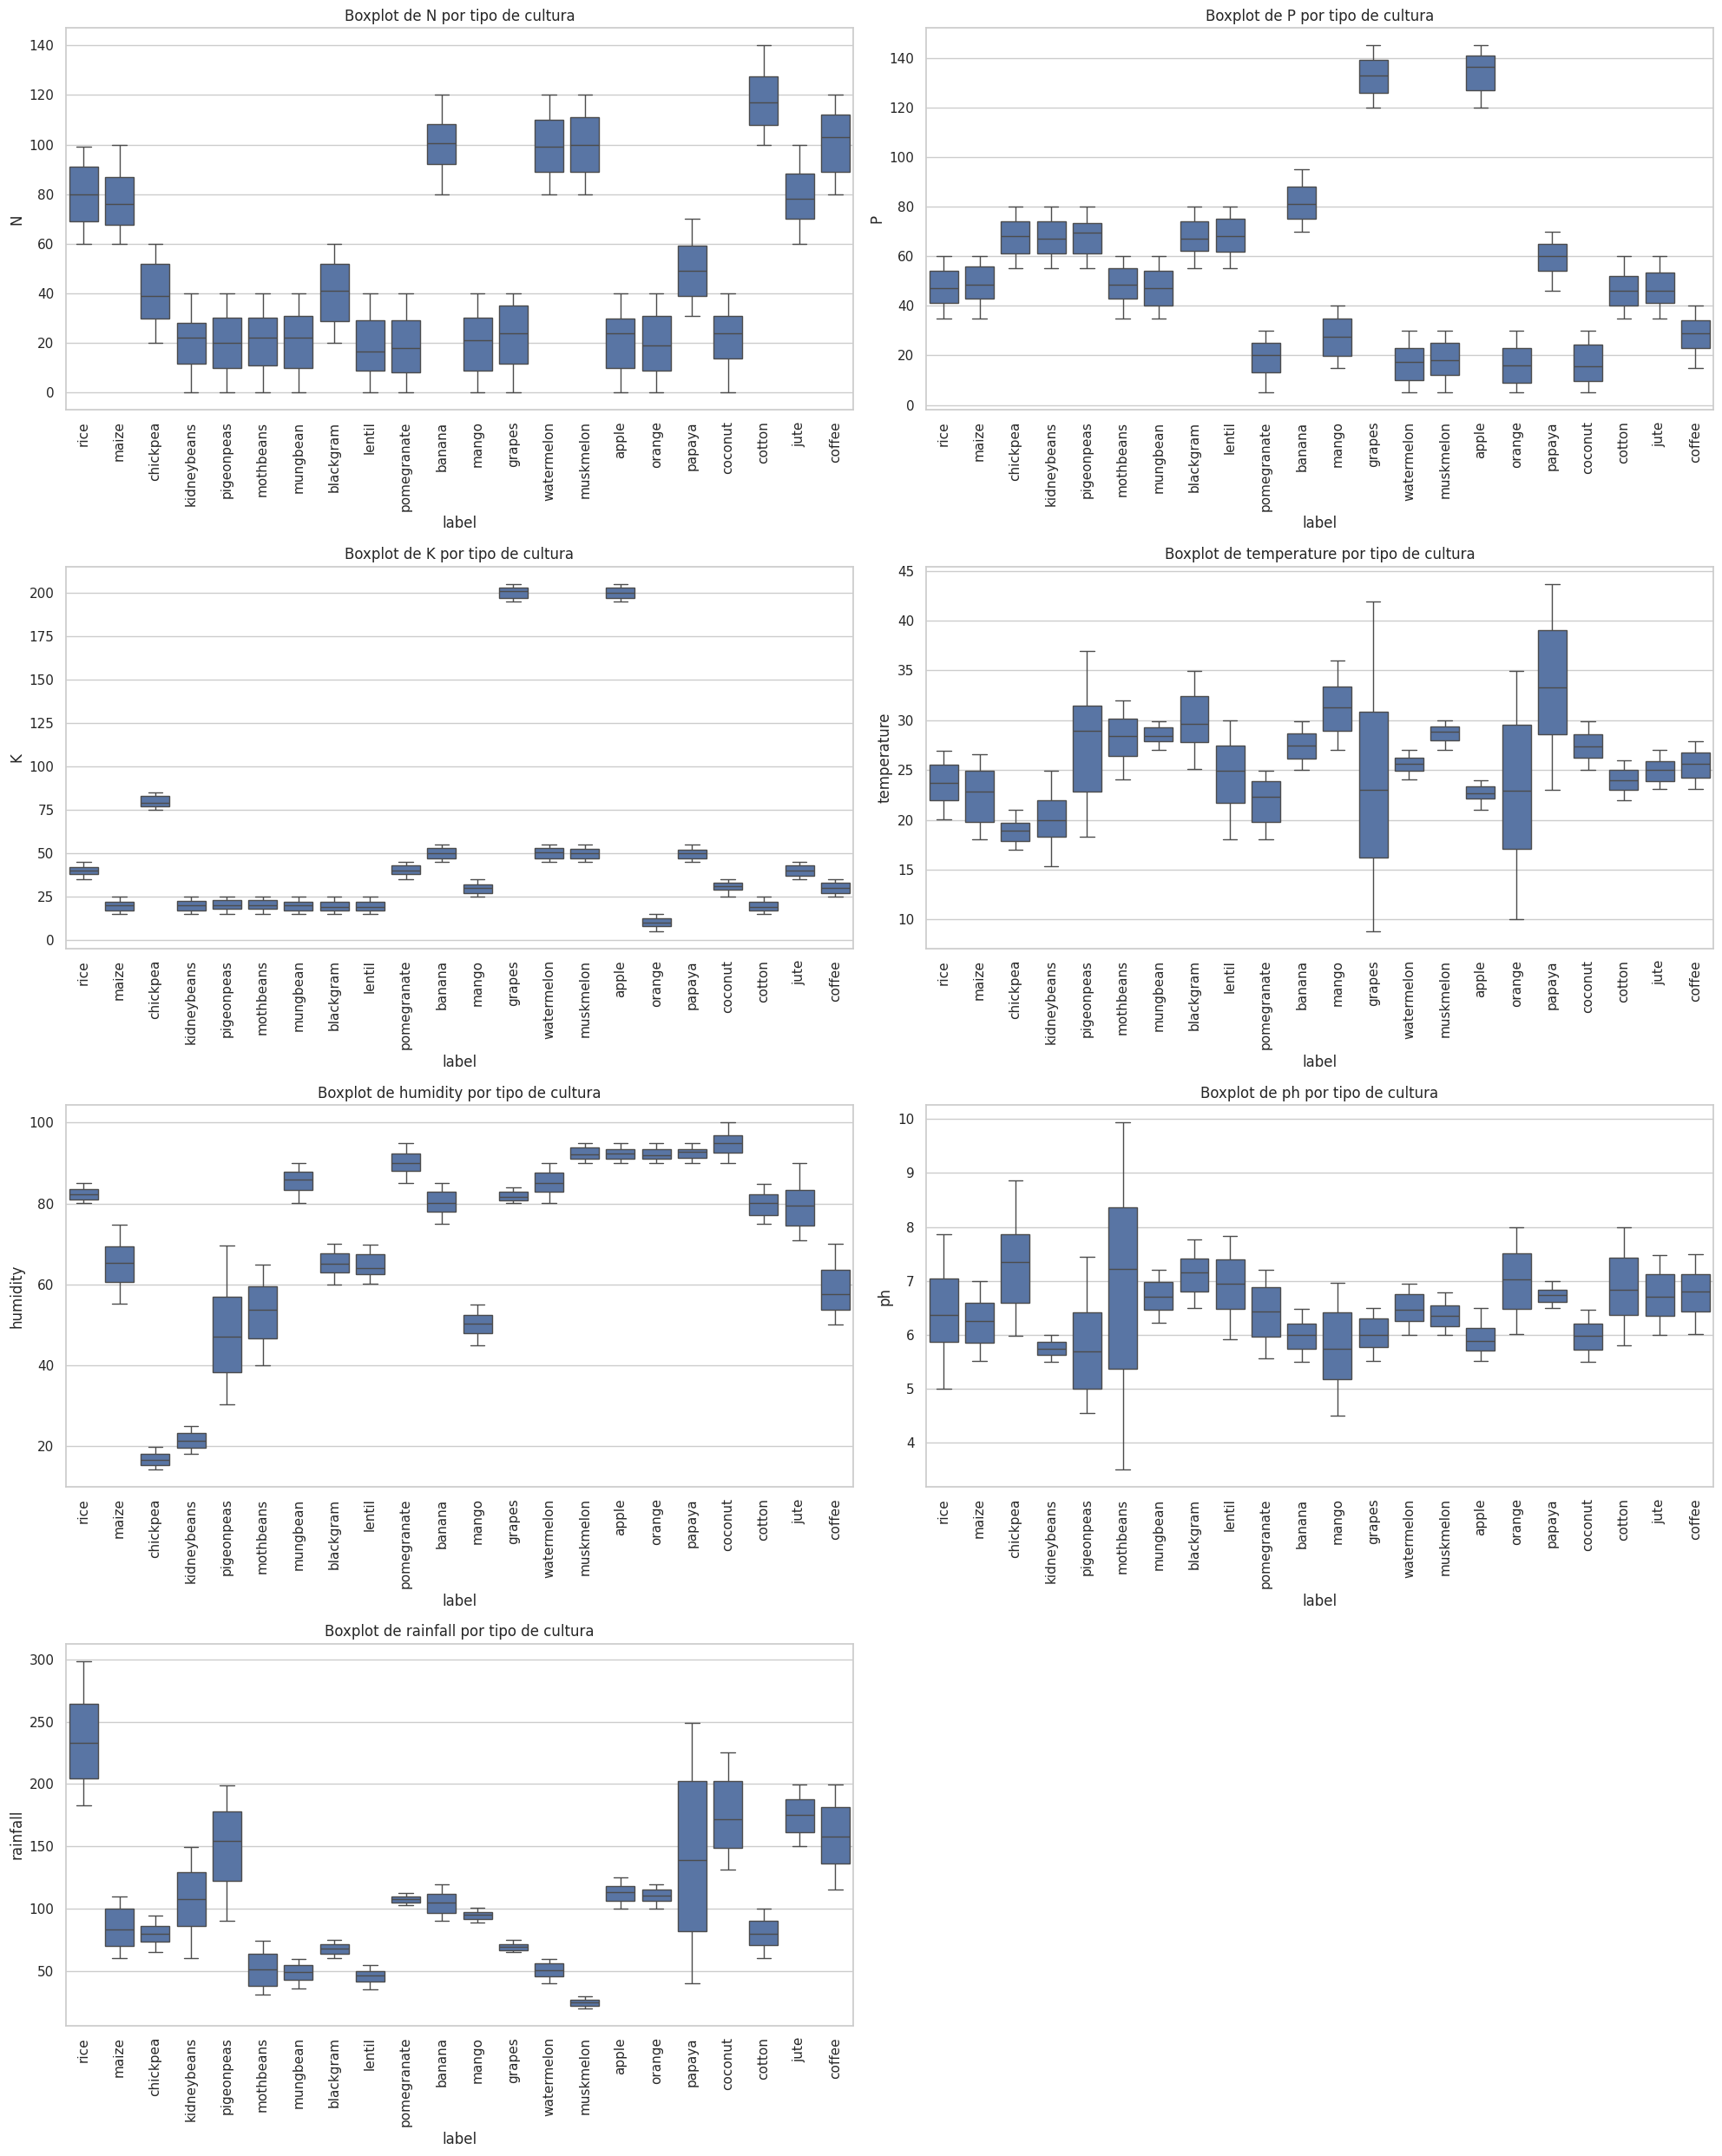

In [18]:
# Define o estilo dos gráficos
sns.set(style="whitegrid")

# Lista de variáveis numéricas
variaveis = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

# Criação dos boxplots
plt.figure(figsize=(20, 25))
for i, var in enumerate(variaveis, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(data=df, x='label', y=var)
    plt.title(f'Boxplot de {var} por tipo de cultura', fontsize=12)
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


## Análise de Outliers e Variações por Tipo de Cultura

A seguir, realizamos uma análise exploratória usando boxplots para cada uma das variáveis do dataset, segmentadas por tipo de cultura (`label`). Essa abordagem nos permite visualizar a distribuição dos dados, identificar a presença de outliers e comparar a variação entre diferentes culturas.

### 1. Nutrientes do Solo

- **N (Nitrogênio)**: Culturas como **coffee**, **cotton** e **muskmelon** apresentam os maiores valores de N, com mediana superior a 100. Em contraste, culturas como **mungbean**, **mothbeans** e **pigeonpeas** têm valores significativamente mais baixos, com várias ocorrências próximas de zero.
- **P (Fósforo)**: As culturas **grapes**, **mango** e **muskmelon** se destacam por exigirem altas concentrações de fósforo, enquanto outras como **apple**, **pigeonpeas** e **papaya** possuem valores bem menores.
- **K (Potássio)**: Há grande variação. **grapes**, **banana**, **mango** e **apple** possuem os maiores valores de K, passando de 190. Já culturas como **mungbean**, **mothbeans** e **pigeonpeas** apresentam valores muito baixos, com mediana abaixo de 20.

### 2. Condições Climáticas

- **Temperature**: As culturas **grapes**, **mango** e **papaya** estão associadas a temperaturas mais elevadas, com medianas acima de 30°C. Já **apple** e **orange** têm temperaturas medianas bem mais baixas, em torno de 20°C.
- **Humidity**: Observa-se uma alta umidade para culturas como **coffee**, **cotton**, **jute** e **coconut**, com valores próximos ou acima de 90%. Por outro lado, culturas como **chickpea**, **maize** e **kidneybeans** se destacam por apresentarem umidade bem menor, com valores medianos abaixo de 30%.
- **Rainfall**: **rice**, **coffee** e **papaya** apresentam altos níveis de precipitação, com valores que ultrapassam os 200mm. Já culturas como **mothbeans**, **mungbean** e **blackgram** ocorrem em regiões com baixa precipitação, frequentemente abaixo de 50mm.

### 3. pH do Solo

- A maioria das culturas se encontra em faixas de pH entre 5.5 e 7.5. No entanto, algumas como **pigeonpeas** e **mothbeans** apresentam uma dispersão maior, indicando sensibilidade ou tolerância a uma maior variação no pH.
- Outliers são visíveis em várias culturas, como **pigeonpeas**, **mungbean** e **chickpea**, sugerindo amostras cultivadas em solos fora da faixa ideal.

### Conclusões

- Culturas com maiores variações nos nutrientes e nas condições ambientais podem demandar cuidados extras no manejo e análise preditiva.
- A presença de outliers em variáveis como N, K e rainfall em algumas culturas indica que o modelo pode precisar de técnicas robustas ou tratamento de dados para evitar viés.
- Boxplots ajudam a identificar rapidamente as características específicas de cada cultura, facilitando a personalização de estratégias de cultivo ou recomendação de culturas adequadas com base nas condições do solo e clima.


### Correlação entre Variáveis Contínuas

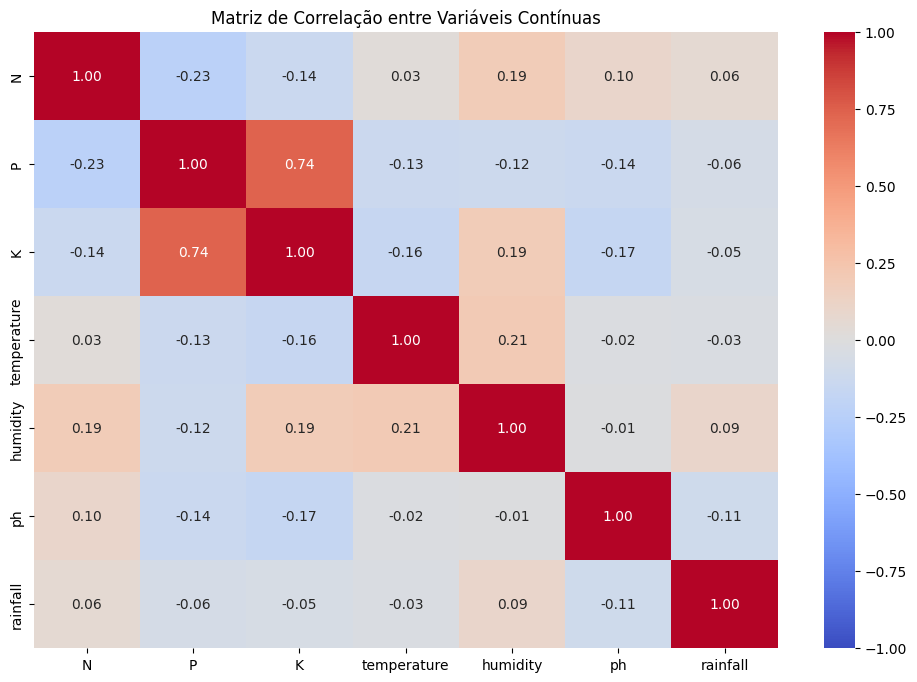

In [14]:
# Seleciona somente as colunas numéricas
df_numericas = df.select_dtypes(include=['float64', 'int64'])

# Calcula a matriz de correlação
matriz_correlacao = df_numericas.corr(method='pearson')

# Visualiza o heatmap da correlação
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(matriz_correlacao, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Matriz de Correlação entre Variáveis Contínuas")
plt.show()


###  Análise de Correlação entre Variáveis Contínuas

Nesta etapa, analisamos a correlação de Pearson entre as variáveis contínuas do dataset. A matriz de correlação gerada permite identificar relações lineares fortes ou fracas entre essas variáveis.

As principais observações são:

- Correlações próximas de **+1** indicam uma forte relação direta: quando uma variável aumenta, a outra tende a aumentar também.
- Correlações próximas de **-1** indicam uma forte relação inversa: quando uma variável aumenta, a outra tende a diminuir.
- Valores próximos de **0** sugerem fraca ou nenhuma relação linear.

Esse tipo de análise é útil para identificar colinearidade entre variáveis e orientar a seleção de atributos em etapas futuras, como modelagem preditiva.

> ⚠️ A correlação não implica causalidade — variáveis correlacionadas podem estar relacionadas a uma terceira variável não considerada.


/tmp/ipykernel_15296/4240687839.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='label', order=df['label'].value_counts().index, palette='Set3')


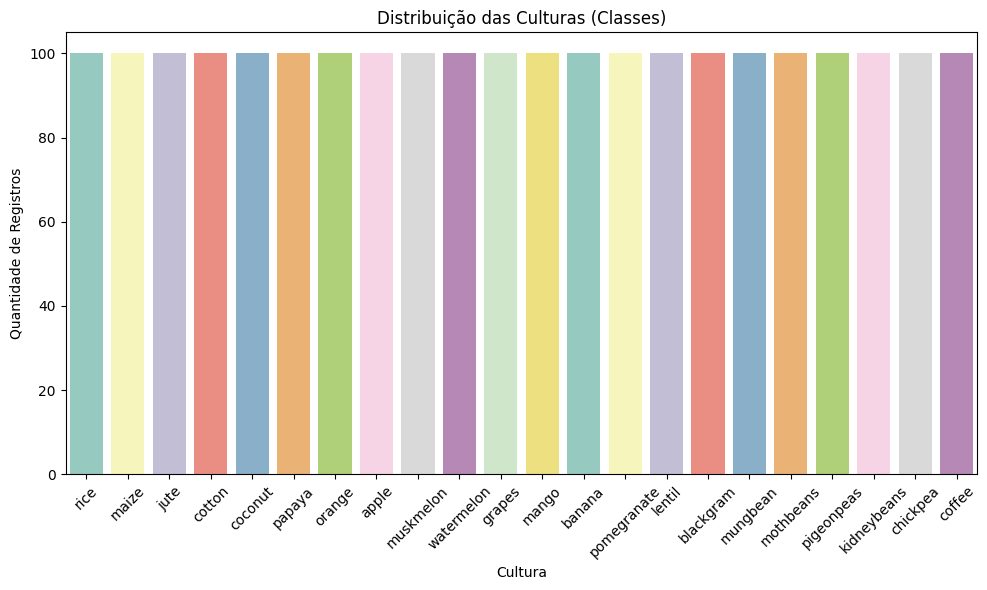

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

label
rice           4.55
maize          4.55
jute           4.55
cotton         4.55
coconut        4.55
papaya         4.55
orange         4.55
apple          4.55
muskmelon      4.55
watermelon     4.55
grapes         4.55
mango          4.55
banana         4.55
pomegranate    4.55
lentil         4.55
blackgram      4.55
mungbean       4.55
mothbeans      4.55
pigeonpeas     4.55
kidneybeans    4.55
chickpea       4.55
coffee         4.55
Name: proportion, dtype: float64

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='label', order=df['label'].value_counts().index, palette='Set3')
plt.title('Distribuição das Culturas (Classes)')
plt.xlabel('Cultura')
plt.ylabel('Quantidade de Registros')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

distribuicao_classes = df['label'].value_counts()
percentuais = df['label'].value_counts(normalize=True) * 100
display(distribuicao_classes)
display(percentuais.round(2))


### Verificação do Balanceamento das Classes (Culturas)

Nesta etapa, analisamos a distribuição da variável alvo (`label`), que representa os diferentes tipos de culturas agrícolas.

Com base no gráfico e nos valores absolutos/percentuais:

- **Algumas culturas** aparecem com **frequência significativamente maior** do que outras.
- Esse desbalanceamento pode impactar o desempenho dos modelos preditivos, que tendem a favorecer as classes majoritárias.
- Classes menos representadas podem ter **baixa acurácia e recall**, dificultando sua correta previsão.

Esse cenário sugere que, caso o desbalanceamento seja muito severo, será necessário aplicar técnicas de **balanceamento de classes**, como:
- Subamostragem da classe majoritária;
- Superamostragem da minoria (como SMOTE);
- Uso de métricas adequadas, como **F1-score** ou **matriz de confusão ponderada**.

> ⚠️ Avaliar o balanceamento é fundamental para garantir modelos mais justos e robustos em problemas de classificação multiclasse.
